In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [46]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [47]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [48]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [50]:
X=df.drop(columns = 'Price')
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [51]:
y=df['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [54]:
reg.intercept_

-2644788.977414433

In [55]:
reg.coef_

array([2.16187374e+01, 1.66145180e+05, 1.21010577e+05, 1.76003779e+03,
       1.51647974e+01])

In [56]:
y_pred_train=reg.predict(X_train)
y_pred_train

array([1440496.62897364, 1300895.27405523, 1227668.03661568, ...,
       1049035.60275342,  808417.50754394, 1661283.67059125])

Text(0, 0.5, 'Predicted price')

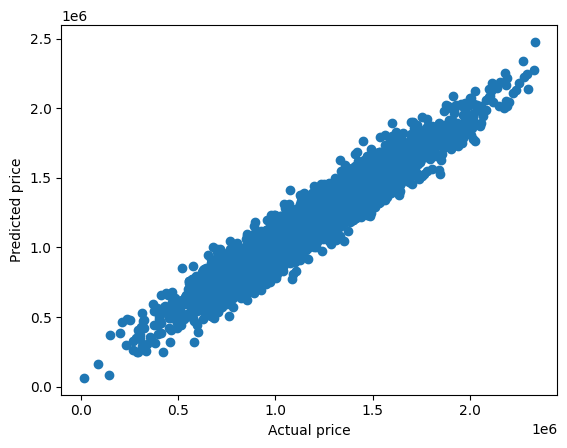

In [58]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [60]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.9170706297974371

In [62]:
y_pred_test=reg.predict(X_test)
y_pred_test

array([ 969608.3468674 ,  953868.15550976,  907506.32824814, ...,
       1423701.02106515,  744400.93306008,  488525.83115776])

Text(0, 0.5, 'Predicted price')

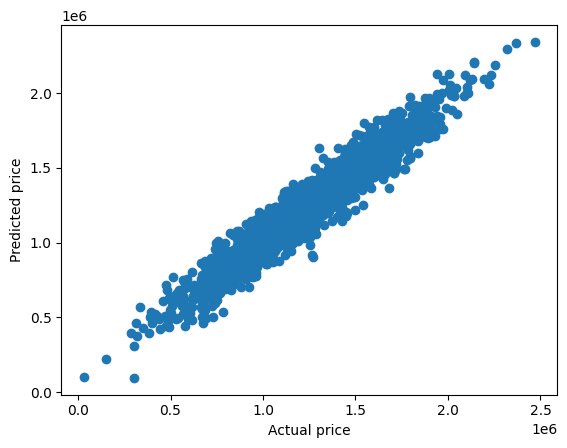

In [63]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [64]:
r2_score(y_test,y_pred_test)

0.9200757649506062